In [1]:
import zipfile
zipfile.ZipFile('/content/drive/MyDrive/data/archive.zip', 'r').extractall()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

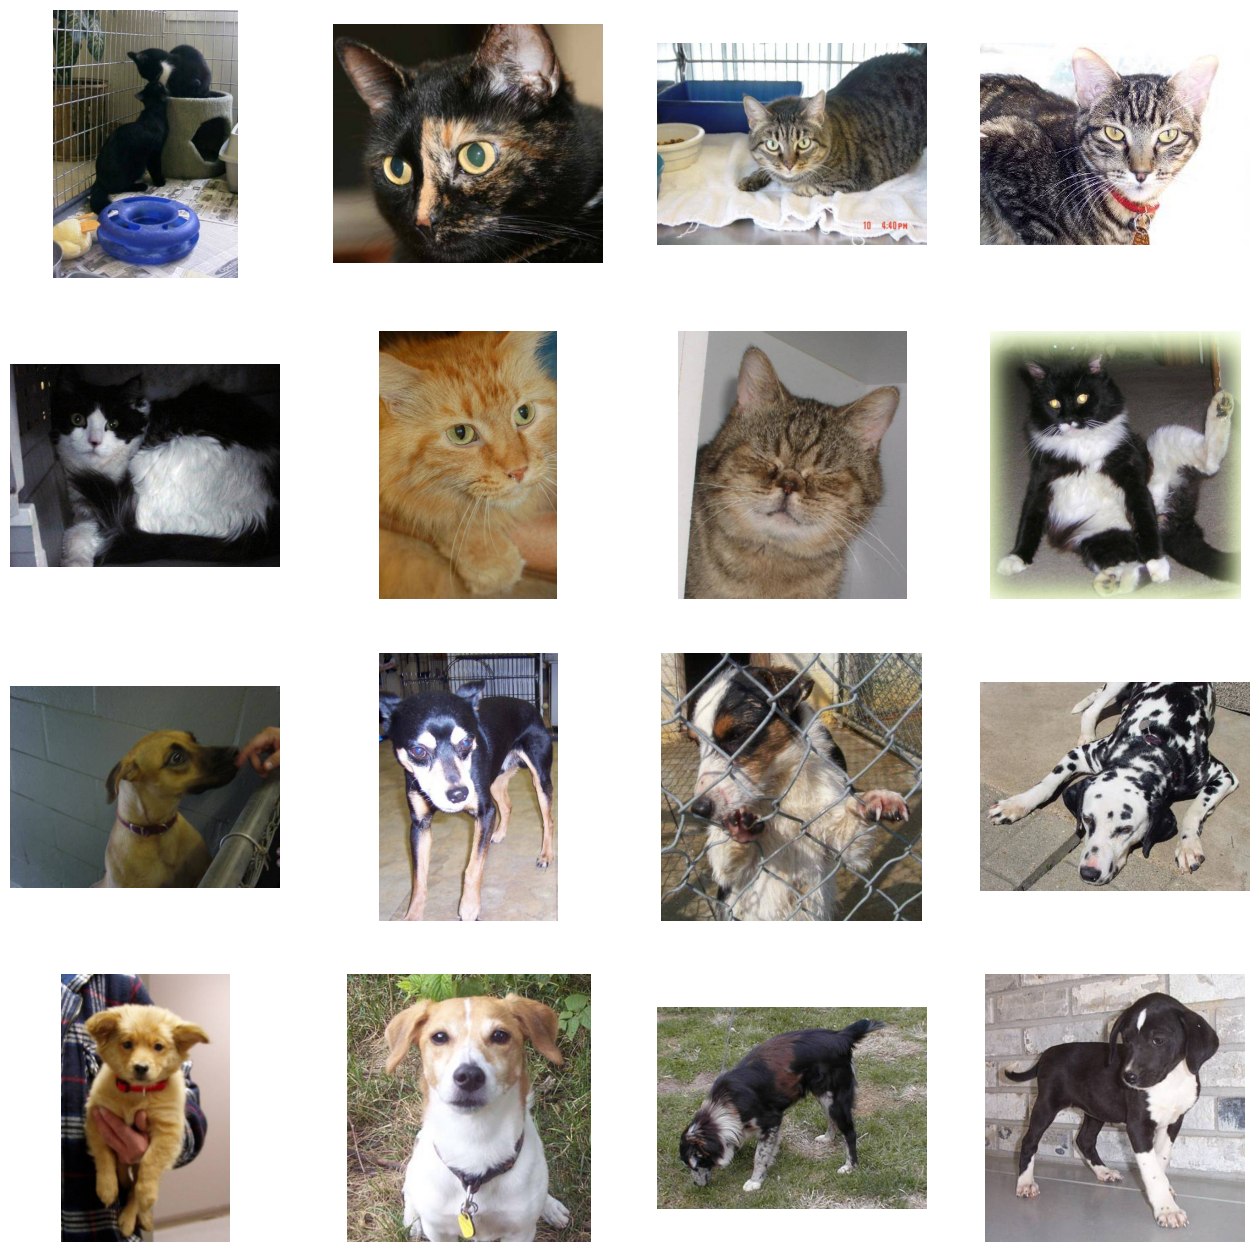

In [3]:

fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/training_set/training_set/cats')
dog_dir = os.path.join('/content/training_set/training_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [4]:
train_dir='/content/training_set/training_set'
test_dir='/content/test_set/test_set'


train_cat_dir=train_dir+'/cats'
train_dog_dir=train_dir+'/dogs'

train_cat_fnames=os.listdir(train_cat_dir)
train_dog_fnames=os.listdir(train_dog_dir)

# test_cat_fnames=os.listdir(test_dir+'cats')
# test_dog_fnames=os.listdir(test_dir+'dogs')

In [5]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,#rescaling factor
                                rotation_range=45, #Int. Degree range for random rotations.
                                width_shift_range=0.2, #fraction of total width
                                height_shift_range=0.2,#fraction of total height
                                shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                                zoom_range=0.2,#Float or [lower, upper]. Range for random zoom
                                horizontal_flip=True,#Boolean. Randomly flip inputs horizontally.
                                fill_mode='nearest' #Points outside the boundaries of the input are filled according to the given mode
                                )

test_datagen=ImageDataGenerator(rescale=1.0/255.0)

#ImageDataGenarator will generate dataset, as well as generate training labels based on the path,for example,
#our training directory is ../input/cat-and-dog/training_set/training_set/, there are two directory under it, cats and dogs,
#then the generator will generate data with label 'cats' and 'dogs', and with all pictures under each directory respectively
train_generator=train_datagen.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 64)       

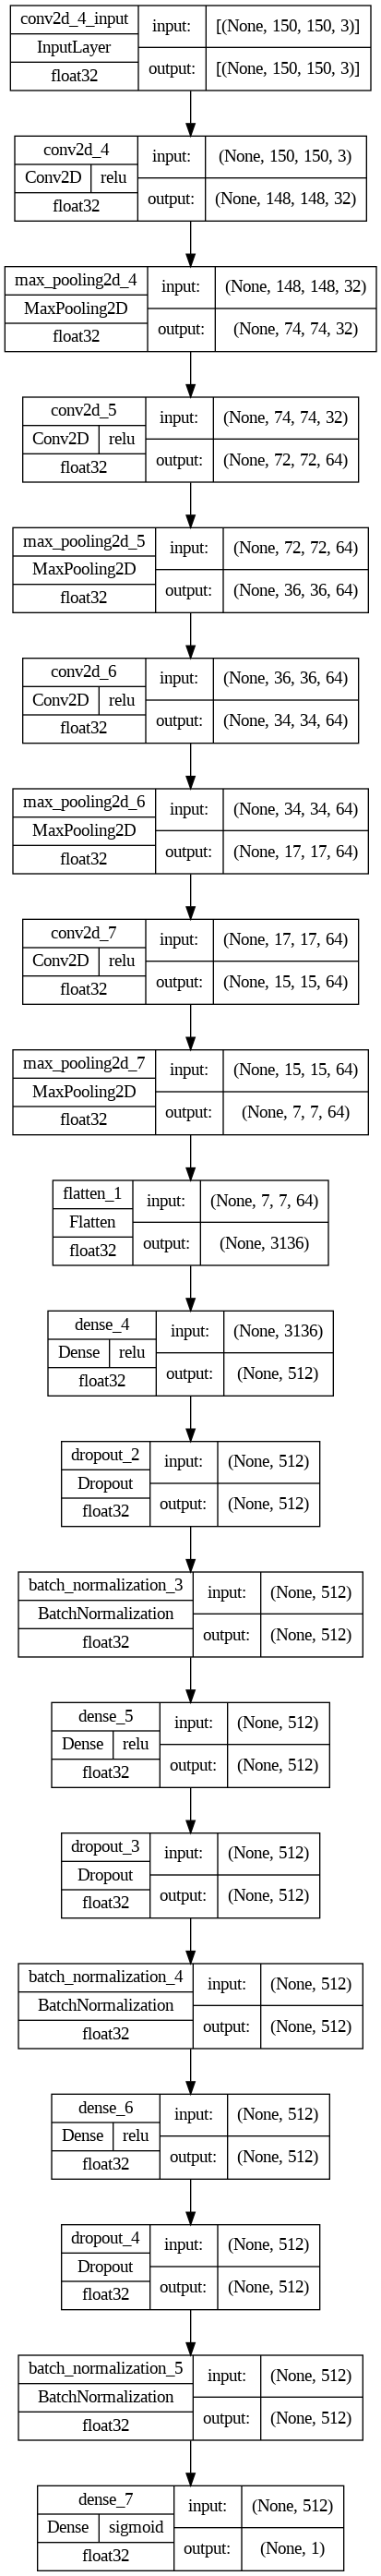

In [9]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [18]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [19]:
# Fit the model with early stopping
history = model.fit(
    train_generator,
    epochs=31,
    validation_data=test_generator)

Epoch 1/31
401/401 [==============================] - 61s 143ms/step - loss: 0.8208 - accuracy: 0.5233 - val_loss: 0.8753 - val_accuracy: 0.4884
Epoch 2/31
401/401 [==============================] - 57s 142ms/step - loss: 0.7386 - accuracy: 0.5021 - val_loss: 0.7997 - val_accuracy: 0.5156
Epoch 3/31
401/401 [==============================] - 58s 143ms/step - loss: 0.7109 - accuracy: 0.5178 - val_loss: 0.7535 - val_accuracy: 0.5017
Epoch 4/31
401/401 [==============================] - 56s 141ms/step - loss: 0.7043 - accuracy: 0.5230 - val_loss: 0.6854 - val_accuracy: 0.5492
Epoch 5/31
401/401 [==============================] - 58s 144ms/step - loss: 0.6971 - accuracy: 0.5367 - val_loss: 0.7281 - val_accuracy: 0.5620
Epoch 6/31
401/401 [==============================] - 56s 141ms/step - loss: 0.6939 - accuracy: 0.5378 - val_loss: 0.7002 - val_accuracy: 0.5185
Epoch 7/31
401/401 [==============================] - 59s 147ms/step - loss: 0.6975 - accuracy: 0.5293 - val_loss: 0.7003 - val_ac

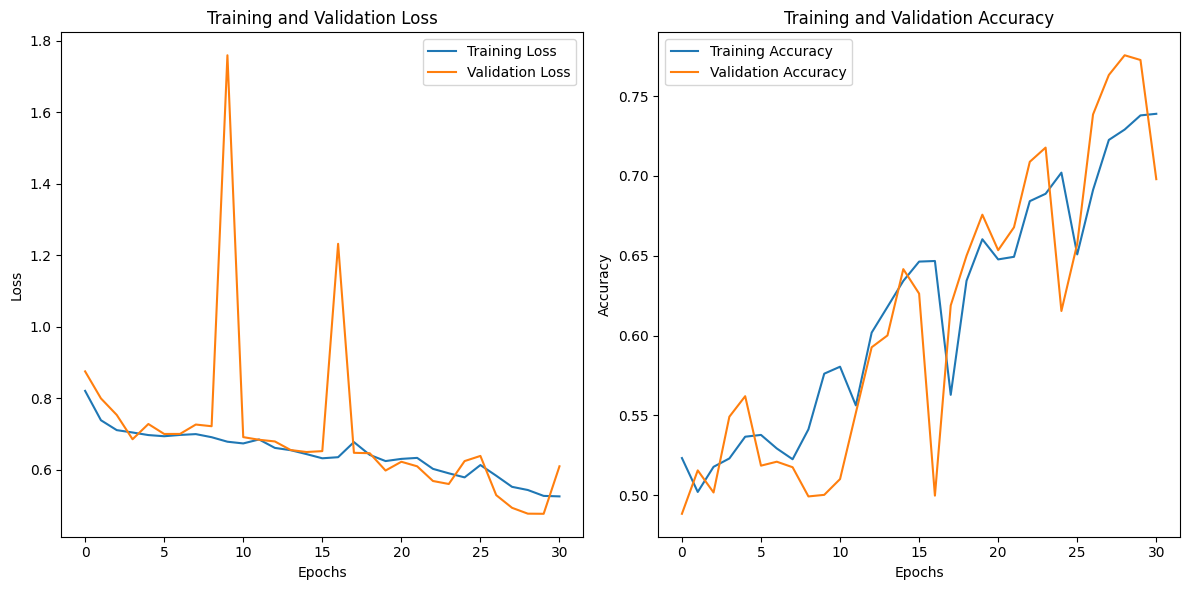

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'history' is your model's training history
history_df = pd.DataFrame(history.history)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 127ms/step
Cat


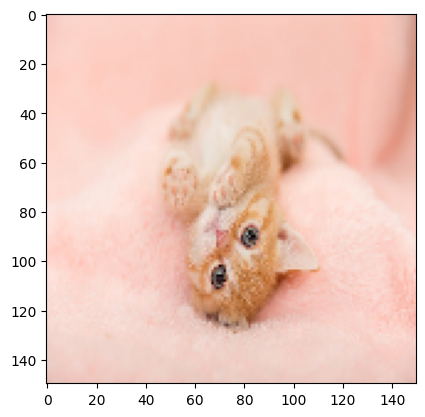

In [21]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/cat-sample_1313.jpg',target_size=(150,150))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image_class(model, image_path):
    # Load and preprocess the image
    test_image = image.load_img(image_path, target_size=(150,150))
    plt.imshow(test_image)  # Display the image
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Predict the class
    result = model.predict(test_image)

    # Display the prediction
    if result >= 0.5:
        return "Dog"
    else:
        return "Cat"




1/1 [==============================] - 0s 17ms/step
Prediction for /content/cat-sample_1313.jpg: Cat
1/1 [==============================] - 0s 17ms/step
Prediction for /content/download (1).jpeg: Dog


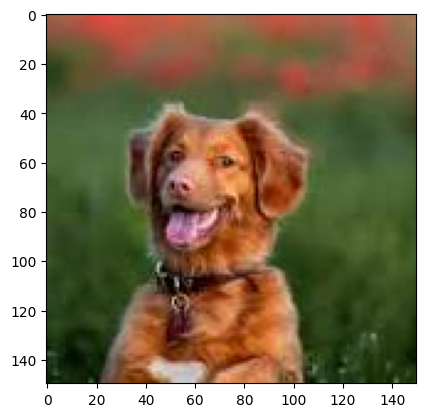

In [23]:
# Example usage:
image_path_1 = '/content/cat-sample_1313.jpg'
prediction_1 = predict_image_class(model, image_path_1)
print(f"Prediction for {image_path_1}: {prediction_1}")

image_path_2 = '/content/download (1).jpeg'
prediction_2 = predict_image_class(model, image_path_2)
print(f"Prediction for {image_path_2}: {prediction_2}")

# Add more image paths and predictions as needed.

In [ ]:
from tensorflow.keras.models import load_model
# Save the entire model
model.save("dog_cat_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("dog_cat_model.h5")


In [ ]:
!pip install ipywidgets tensorflow matplotlib


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_display(img_path):
    # Load and display the image
    img = Image(filename=img_path)
    display(img)

    # Load and preprocess the image
    test_image = image.load_img(img_path, target_size=(200, 200))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Predict the class
    result = loaded_model.predict(test_image)

    # Display the prediction
    if result >= 0.5:
        prediction_label.value = "Dog"
    else:
        prediction_label.value = "Cat"

# Create an Upload button widget
upload_button = widgets.FileUpload()

# Create a Label widget for displaying the prediction
prediction_label = widgets.Label(value="Prediction: ")

# Define a function to handle the file upload event
def on_upload_button_click(change):
    if upload_button.value:
        img_path = list(upload_button.value.keys())[0]
        predict_and_display(img_path)
        # Clear the uploaded file after processing
        upload_button.value.clear()

# Attach the function to the button's click event
upload_button.observe(on_upload_button_click, names='value')

# Display the widgets
display(upload_button)
display(prediction_label)


FileUpload(value={}, description='Upload')

Label(value='Prediction: ')